# 지도학습 비지도학습 모델

- 머신러닝 본격적인 시작은 파이썬 사이킷런 라이브러리로 시작합니다.
<br><br>
- 사이킷런에 기본적으로 내장되어 있는 데이터 중 하나인 붓꽃 데이터 예시를 통해 머신러닝 모델을 지도, 비지도 모델을 실습해보겠습니다.
<br><br>
- 다시 한번 기억할 것은 지도학습은 레이블(종속변수)가 있고 비지도학습은 클래스(종속변수)가 없습니다.

## 지도학습
- K-최근접 이웃(K-Nearest Neighbor, K-NN)은 새로운 데이터가 주어졌을 때 기존 데이터 가운데 가장 가까운 K 개 이웃의 정보를 새로운 데이터를 예측하는 모델입니다.

## K-NN
- K-NN은 특별한 학습이라고 할 만한 절차가 없습니다.
<br><br>
- 새로운 데이터가 들어왔을 때, 기존 데이터 사이 거리를 계산해 이웃들을 선택하기 때문입니다.
<br><br>
- K-NN은 모델을 별도로 구축하지 않는다는 뜻으로 게으른 모델(Lazy model)이라고 하기도 하고 사례중심학습(Instance-based learning)이라고도 합니다. 
<br><br>
- 데이터로부터 모델을 생성해 주어진 임무를 수행하는 대부분 머신러닝 모델기반 학습(Model-Based Learning)과 대비되는 개념으로, 
별도 모델 생성과정 없이 각각의 관측치(instance)만을 이용하여 분류/회귀 등을 수행한다는 뜻입니다.
<br><br>
- K-NN의 하이퍼파라미터는 탐색할 이웃 수(K), 거리 측정 방법 두 가지뿐입니다.
<br><br>
- K가 작을 경우 데이터의 지역적 특성을 지나치게 반영하게 되고(Overfitting). 반대로 매우 클 경우 모델이 과하게 정규화 되는 경향이 있습니다(Underfitting). 최근 빅데이터기반 머신 러닝에서는 많이 사용되지 않은 전통적인 머신러닝 모델입니다.
<br><br>
<br><br>

|장점|단점|
|:------:|:---:|
|알고리즘이 간단하여 구현하기 쉽다 / 수치 기반 데이터 분류 작업에서 성능이 좋다|학습 데이터의 양이 많으면 분류 속도가 느려진다 (사실 사전 계산을 할 수 없기 때문에 학습 과정이 따로 없기 때문에 분류 속도가 느리다) / 차원(벡터)의 크기가 크면 계산량이 많아진다|

## 지도학습모델

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

iris = datasets.load_iris()

# 종속변수 지정
y = iris.target

# train/test 데이터 분리
train_input, test_input, train_label, test_label = train_test_split(iris['data'], y,
                                                                        test_size = 0.3,  # test data의 비율
                                                                        random_state=0)  # random seed 값

# 지도학습 모델 중 k-nn 모델 생성
knn = KNeighborsClassifier(n_neighbors=1)

# 모델 학습
knn.fit(train_input, train_label)

# 분류기 모델의 결과 예측
predict_label = knn.predict(test_input)

# 정확도 확인
print('test accuracy {:.2f}'.format(np.mean(test_label == predict_label)))

test accuracy 0.98


C:\Users\BurgerC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## 비지도학습
- K-means 알고리즘은 목표변수(라벨, 클래스)없이, 정답을 모르는 상태로 학습을 하는 대표적인 비지도학습(Unsupervised learning) 알고리즘 중 가장 쉽고 많이 사용되는 클러스터링 또는 군집분석 알고리즘입니다.
<br><br>
- K-means 특징
>- K-means 알고리즘은 직관적으로 이해가 쉽고, 간단하게 구현할 수 있는 모델입니다. 
<br><br>
>- 데이터 간의 거리를 구하는 유클리드(Euclidean distance) 거리를 이용하는 군집 분석이나 다른 분석 방법들이 그렇듯 이상데이터에 민감합니다.
<br><br>
>- 이를 극복하기 위해서 계산 비용이 늘어나는 것을 감수하고라도 다른 거리 지표(median)를 사용하기도 합니다.
<br><br>
>- 이 알고리즘은 데이터의 군집이 원형으로 나누어져 있을 때 잘 동작하기 쉬운 알고리즘이며 원형이 아니라 직선으로 분리된 데이터셋이나 그 외 다른 모양의 군집 모양을 가졌을 때 적절하지 않을 수도 있습니다.
<br><br>
>- 사전에 군집 대상인 K(하이퍼파라미터)의 수를 미리 알고 있어야 하며 K 값을 추천할 가능성이 있습니다.
<br><br>
>- 따라서 k의 값이 커질수록 일종의 패널티를 준다든지 해서 적정한 k의 수를 선택할 수 있게끔 하는 방법 등도 고려해야 합니다.
<br><br><br><br>
- K-means 군집 단계
>1. 초기화(Initalization): 데이터 집합에서 k개의 초기 중심점을 무작위로 선택합니다. 이는 최초에 각 클러스터들의 중심이 어디인지 파악하기 못하기 때문입니다.<br><br>
>1. 클러스터 할당(Cluster Assignment): 중심에 가장 가까운 모든 데이터 요소가 클러스터를 구성합니다. 데이터 포인트와 모든 중심점 사이의 유클리드 거리를 사용하여 두 점 사이의 직선이 그려지며 경계선을 기준으로 두 개의 클러스터로 나뉘어지게 됩니다.<br><br>
>1. 중심 이동(Move the centroid): 2번 과정까지 거치고 난 후, 센터가 필요한 새로운 클러스터가 남았다면 인접한 중심점과의 새로운 경계를 생성하여 새로운 클러스터를 생성합니다.<br><br>
>1. 2와 3의 과정을 더 이상 중심점이 이동하지 않을 때까지 반복적으로 수행합니다.
<br><br>
- 클러스터링은 특성이 비슷한 데이터끼리 묶어주는 머신러닝 기법입니다.
<br><br>
- 비슷한 뉴스나 사용 패턴이 유사한 사용자를 묶어 주는 것과 같은 패턴 인지나, 데이터 압축등에 널리 사용되는 학습 방법입니다.
<br><br>
- 클러스터링 알고리즘은 여러가지 기법이 있으며, 알고리즘의 특성에 따라 속도나 클러스터링 성능에 차이가 있기 때문에, 데이터 모양에 따라서 적절한 클러스터링 알고리즘을 선택하는 것이 중요합니다.

## 비지도학습모델

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


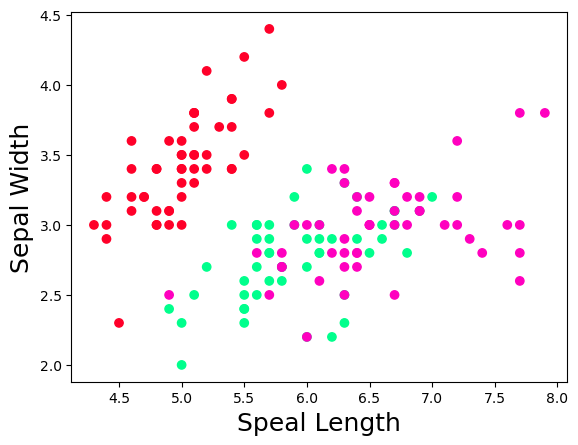

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# 데이터 불러오기
iris = datasets.load_iris()

# 종속변수 지정
X = iris.data[:, :2]
y = iris.target

# Sepal length와 Sepal width 컬럼 두 개만 추출하여 스캐터 플롯으로 확인

plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Speal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

# 비지도학습 모델
KMeans = KMeans(n_clusters = 3, random_state=21)

# 모델 학습
KMeans.fit(X)

# 중심점출력
centers = KMeans.cluster_centers_
print(centers)

Text(0.5, 1.0, 'Predicted')

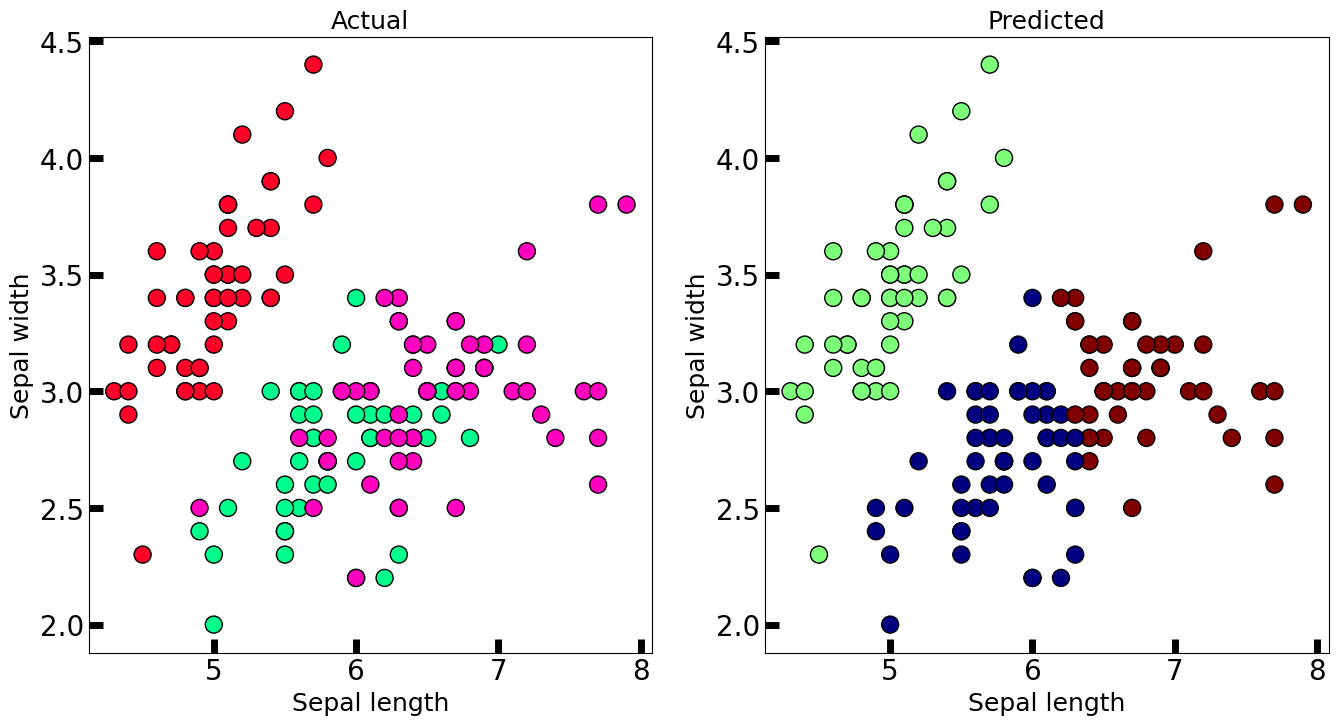

In [3]:
# 원본 데이터와 클러스링 결과 비교
# 해당 데이터가 어느 클러스터에 속하는지 확인 합니다.
new_labels = KMeans.labels_

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

# 인공신경망 모델

## 인공신경망
- 퍼셉트론(Perceptron)은 프랑크 로젠블라트(Frank Rosenblatt)가 1957년에 제안한 초기 형태의 인공 신경망으로 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘입니다.
<br><br>
- 인간 신경망은 퍼셉트론으로 만들어 보면 x는 입력값, w는 가중치(weight), y는 출력값이 됩니다.
<br><br>
- 각각의 인공 뉴런에서 보내진 입력값 x는 각각의 가중치 W와 함께 인공 뉴런(y)에 전달되고 있습니다.
<br><br>
- 각각의 입력값에는 각각의 가중치가 존재하는데, 이때 가중치의 값이 크면 클수록 해당 입력 값이 중요하다는 것을 의미합니다.
<br><br>
- 각 입력값이 가중치와 곱해져서 인공 뉴런에 보내지고, 각 입력값과 그에 해당되는 가중치의 곱의 전체 합이 임계치(threshold)를 넘으면 종착지에 있는 인공 뉴런(y)은 출력 신호로서 1을 출력하고, 그렇지 않을 경우에는 0을 출력합니다. 이렇게 뉴런에서 출력값을 변경시키는 함수를 '활성화 함수(Activation Function)'라고 합니다. 퍼셉트론은 활성화 함수로 계단함수(계단 함수는 로지스틱에서 이미 배웠습니다)를 사용하였지만, 그 뒤에 등장한 여러가지 발전된 신경망들은 계단함수 외에도 여러 다양한 활성화 함수를 사용하기 시작했습니다. 퍼셉트론 계단함수를 로지스틱 회귀에서 배운 시그모이드 함수로 변경하면 방금 퍼셉트론의 이진 분류를 수행하는 로지스틱 회귀와 동일함을 알 수 있습니다. 로지스틱 회귀 모델은 인공 신경망에 하나의 인공 뉴런이며 로지스틱 회귀를 수행하는 인공 뉴런과 퍼셉트론의 차이는 단지 활성화 함수의 차이입니다. 활성화 함수는 신경망 모델의 주요 성능 요소이기 때문에 다시 살펴보겠습니다.
<br><br>
- 인공 신경망(ANN, Arttificial Neeural networks)은 인간 두뇌의 신경 체계를 모방한 퍼셉트론으로부터 발전되었습니다. 각 인공 신경 체계는 시스템 내부에서 다른 뉴런과 연결되며 신경망은 계층(Layer)들로 배열되어, 한 계층의 뉴런이 다음 계층의 다수 뉴런에게 데이터를 전달하는 구조입니다. 초기 ANN은 은닉 계층이 하나 였습니다. 과거 데이터 양의 한계와 가중치 최적화가 어려워 신경망의 성능을 보장할 수 없었기 때문입니다. 이런 이유로 단일 은닉 계층의 ANN은 얕은 신경망(shallow neural networks)으로 불리기도 했습니다.
<br><br>
- 인공 신경망은 회귀모델과 비교 하면 회귀모델은 은닉층(증간층)없이 입력값과 출력값 간의 관계가 직접 연결되어 있습니다. 또한 인공 신경망 모델은 입력층에서 출력층 방향으로 연산이 전개되는 피드 포워드 신경망(Feed-Forward Neural Network, FFNN)이라고 합니다. 이렇게 별도로 부르는 이유는 FFNN이 아닌 신경망이 존재하기 때문입니다. RNN은 은닉층의 출력값을 출력층으로도 값을 보내지만, 동시에 은닉층의 출력값이 다시 은닉츠으이 입력으로 복잡하게 사용되기도 합니다.
<br><br>
- 기존 인공 신경망은 컴퓨팅 파워의 한계로 깊은 심층망 구성이 어려웠는데 최근 여러 알고리즘과 GPU와 같은 컴퓨터 칩 기술의 발달로 심층망을 사용하기 쉬워졌고 이것은 오늘날 딥러닝등과 같이 전통 인공신경망 구조를 변형하고 개선한 다양한 모델들이 진화를 거듭하고 있습니다.

## 기본 신경망
- 신경망 모델은 x 입력에서 W 가중치와 b 바이어스를 학습을 통해 y 결과 값을 찾는 과정입니다.

In [4]:
# 케라스
import keras
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
x = numpy.array([0, 1, 2, 3, 4, 5])
y = x * 2 + 1
print(x)
print(y)

[0 1 2 3 4 5]
[ 1  3  5  7  9 11]


In [5]:
# ANN 모델 정의
model = keras.models.Sequential()

# ANN 층 설정
# 입력노드 1개, 가중치 1개. 선형모델
model.add(keras.layers.Dense(1, input_shape=(1,)))

# ANN 모델 설정
# 최적화 알고리즘: 확률적 경사하강법(SGD)
# 손실함수: 평균제곱함수(MSE)
model.compile(optimizer='SGD', loss='mse', metrics=["accuracy"])

# ANN 모델 학습
# 전체 데이터중 2개를 이용 입출력 신호 지정
# Epochs : 반복 학습 횟수
# verbose 학습진행 상황(0, 1, 2)
hist = model.fit(x[:2], y[:2], epochs=1000, verbose=0)

# ANN 모델 평가
print('Targets:', y[2:])
print('Predictions:', model.predict(x[2:]).flatten())

# 모델 요약
model.summary()

Targets: [ 5  7  9 11]
1/1 [==============================] - 0s 55ms/step
Predictions: [ 4.9411793  6.8986163  8.856052  10.81349  ]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
'''모델 정보 출력'''
l1 = model.layers[0]

print(' name : {},\n type : {}, \n shape : {}, \n activation : {}, \n params : {}'.format(l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params()))

 name : dense,
 type : <class 'keras.layers.core.dense.Dense'>, 
 shape : (None, 1), 
 activation : linear, 
 params : 2


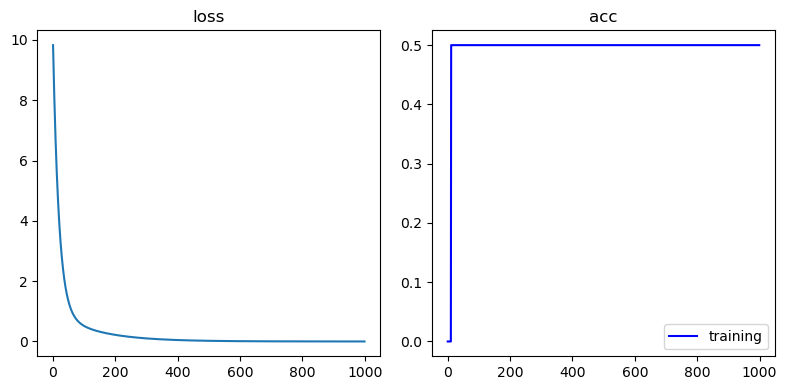

In [7]:
'''결과 시각화'''

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("loss")

plt.subplot(1, 2, 2)
plt.title("acc")
plt.plot(hist.history['accuracy'], 'b-', label="training")
plt.legend()
plt.tight_layout()
plt.show()

## 케라스 신경망
- 케라스를 사용한 신경망 작업 절차는 보통 다음과 같이 진행합니다.
<br><br>
- 1단계: 입출력 훈련 데이터 정의
<br><br>
- 2단계: 신경망 모델 정의
>1. Sequential 모형 클래스 객체 생성
>> 케라스 모델 정의 방법은 두 가지 있습니다.<br><br>
>> 첫째, 가장 자주 사용하는 구조인 층을 순서대로 쌓아 올린 네트워크를 사용하는 Sequential 클래스가 있습니다.<br><br>
>> 둘째, 완전히 새로운 구조를 만들 수 있는 비순환 유향 그래프(DAG, Directed Acyclic Graph)인 함수형 API를 사용하는 방법이 있습니다.<br><br>
>> 초보 단계에서는 Sequential 클래스를 사용하면 됩니다.<br><br>
<br><br>
>1. add 함수로 신경망 레이어 추가<br><br>
>>1. 입력단부터 순차적으로 추가<br><br>
>>1. 레이어는 출력 뉴런 개수를 첫 번째 인수로 받는다.<br><br>
>>1. 최초의 레이어는 input_dim 인수로 입력 크기를 설정<br><br>
>>1. activation 인수로 활성화 함수 설정<br><br>
- 3단계: 모델 학습<br><br>
> compile 메서드로 모형 완성<br><br>
>>1. optimizer 인수로 최적화 알고리즘 설정<br><br>
>>1. loss인수로 비용함수 설정<br><br>
>>1. metrics 인수로 트레이닝 단계에서 기록할 성능 기준 설정<br><br>
<br><br>
- 4단계 모델의 fit()함수를 반복적으로 수행
<br><br>
- fit 메서드로 트레이닝
>1. nb_epoch 로 에포크(epoch) 횟수 설정<br><br>
>1. batch_size 로 배치크기(batch size) 설정<br><br>
>1. verbose는 학습 중 출력되는 문구를 설정하는 것으로, 주피터노트북(Jupyter Notebook)을 사용할 때는 verbose=2로 설정하여 진행막대(progress bar)가 나오지 않도록 설정

## 케라스 ANN 이미지 모델


### 데이터 불러오기
- MNIST 데이터를 이용해서 손글씨 데이터를 분류하고 예측하는 모델을 만들어 보겠습니다.
<br><br>
- 케라스에는 기본적으로 MNIST 데이터가 numpy 배열 형태로 포함되어 있습니다. 다음과 같이 불러온 MNIST train_images 에는 총 60,000개의 28x28 크기의 이미지와 train_labels에는 이미지 60,000개에 대한 결과값(0~9)이 담겨 있습니다. 그리고 test_images에 10,000개의 이미지와 레이ㅣ블 데이터가 있습니다. train_images을 통해 모델을 학습하고, test_images를 이용해 학습된 모델의 정확도를 평가하는 절차로 진행합니다.

In [18]:
# 필요한 라이브러리 불러오기
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

# MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### 데이터 전처리
- MNIST 첫 번째 데이터는 5이고 두 번째 데이터는 0으로 확인됩니다.

- 이미지 데이터 준비하기 (모델에 맞는 크기로 바꾸고 0과 1사이로 스케일링)<br><br>
>- train_images = train_images.reshape((60000, 28 * 28))<br><br>
>-train_images = train_images.astype('float32') / 255<br><br>
>-test_images = test_images.reshape((10000, 28 * 28))<br><br>
>-test_images = test_images.astype('float32') / 255<br><br>

In [19]:
train_images = train_images.reshape((60000, 28 * 28))

train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))

test_images = test_images.astype('float32') / 255

In [20]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
for x in train_images[0]:
    for i in x:
        print('{:3}'.format(i), end="")
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

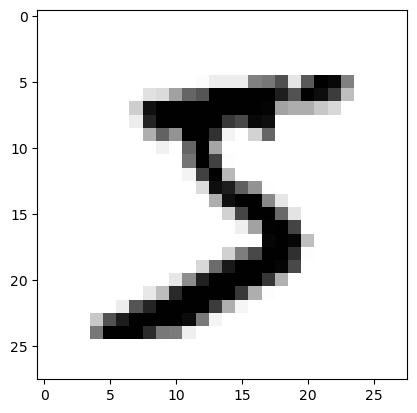

In [10]:
plt.imshow(train_images[0], cmap='binary')

In [21]:
# 두 번째 데이터 
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
for x in train_images[1]:
    for i in x:
        print('{:3}'.format(i), end="")
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

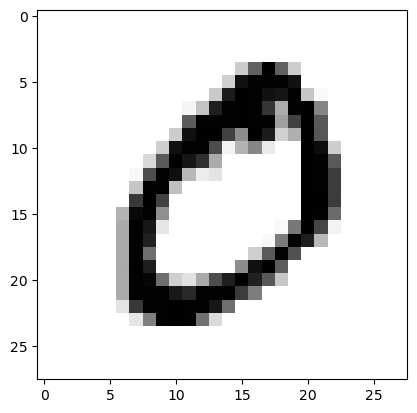

In [12]:
plt.imshow(train_images[1], cmap='binary')

- 범주형 코딩
- 레이블을 범주형으로 인코딩
>- train_labels = to_categorical(train_labels)
>- test_labels = to_categorical(test_labels)

In [35]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### ANN모델링
- Sequential 클래스를 사용하여 모델을 생성합니다. 구축한 신경망 모델은 두 개의 층(layer)으로 완전 연결(fully connected)된 Dense 층 2개가 연속되어 있습니다. 두 번째 층은 10개의 확률 점수가 들어 있는 배열을 반환하는 소프트맥스층입니다. 각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률이 됩니다. Dense의 첫 번째 파라미터는 출력 데이터의 크기, input_shape은 입력 텐서의 크기를 결정합니다. 활성화함수로 relu를 사용합니다. 두 번째 layer처럼 input_shape를 기재하지 않은 경우에는 앞선 층의 출력 크기를 입력 크기로 자동으로 설정합니다. 활성화함수로 softmax를 사용합니다.
<br><br>
- 컴파일 단계에서는 학습 과정을 설정합니다. 여기에서 모델이 사용할 옵티마이저와 손실 함수, 훈련하는 동안 모니터링하기 위해 필요한 측정 지표를 지정합니다. categorical_crossentropy는 손실 함수이며 가중치를 학습하기 위한 피드백 신호로 사용하고 훈련하는 동안 최소화합니다. 그리고 미니 배치 확률적 경사 하강법을 통해 손실이 감소됩니다. 경사 하강법을 적용하는 구체적인 방식은 첫 번째 매개변수로 전달된 rmsprop 옵티마이저에 의해 결정됩니다.

In [36]:
# Sequential 클래스 사용 모델 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 컴파일 하기
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- 다음 입력 데이터의 넘파이 배열을 (그리고 이ㅣ에 상응하는 타깃 데이터를) 모델의 fit() 메서드에 전달하여 학습 과정을 진행합니다.
<br><br>
- fit() 함수를 호출하면 네트워크가 128개 샘플씩 배치로 훈련 데이터를 다섯 번 반복합니다.
<br><br>
- 반복마다 네트워크가 배치에서 손실에 대한 가중치의 그래디언트를 계산하고, 그이 맞추어 가중치를 업데이트합니다.

### 학습


- fit() 메서드로 모델 훈련
>- hist=model.fit(train_images, train_labels, epochs=5, batch_size=128)

In [37]:
hist=model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2941 - accuracy: 0.9159
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1452 - accuracy: 0.9575
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1104 - accuracy: 0.9662
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0897 - accuracy: 0.9723
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0763 - accuracy: 0.9767


### 결과 평가
- 이제 모델이 완성되었으니 테스트 데이터를 적용해서 결과를 확인해보겠습니다. 에포크 1회 수행만으로도 손실을 줄이고 정확도는 좋아지고 있습니다.

In [38]:
# 테스트 데이터로 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test,verbose=2)
print('test_acc: ', test_acc)

313/313 - 0s - loss: 0.0833 - accuracy: 0.9759 - 264ms/epoch - 842us/step
test_acc:  0.9758999943733215


In [39]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


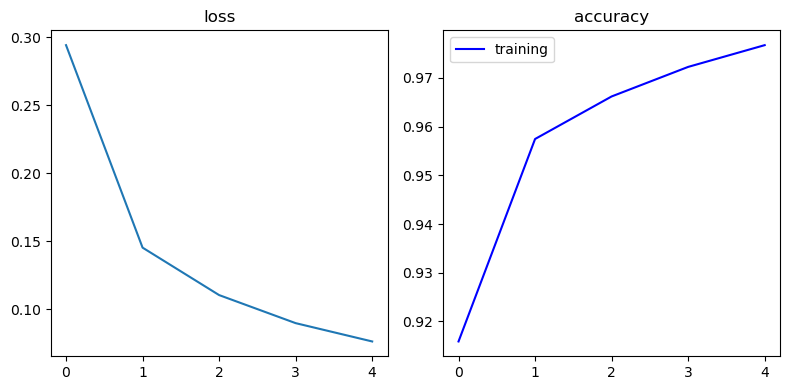

In [40]:
# 시각화 하여 결과를 확인합시다.
import matplotlib as mpl
import matplotlib.pylab as plt

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(1, 2, 2)

plt.title("accuracy")
plt.plot(hist.history['accuracy'], 'b-', label="training")
#plt.plot(model.history['val_accuracy'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()

# 머신러닝 최적화 성능요소

- 가장 좋은 머신러닝 모델은 '일반화가 잘된, 같은 현상을 반복 설명할 수 있는 간단한 모델'이ㅣ라고 함.
<br><br>
- 이 일반화(목표)는 최적화(과정)에서 성능 향상 요소인 비용함수, 옵티마이저, 활성화함수, 가중치 규제, 적당한 데이터 분할을 조정(이를 하이퍼파라미터 튜닝이라고도 함) 함으로써 가능합니다.

## 비용함수
- 선형회귀식과 마찬가지로 신경망에서도 비용함수는 예측값과 출력값의 차이입니다.
<br><br>
- 따라서 학습에서 최소화해야 합니다.
<br><br>
- 문제에 따라 올바른 비용함수를 선택하는 것이 중요한데 신경망은 단순히 비용함수를 최소화 하기 위해 진행하므로 그 과정에서 원하지 않는 부수적인 효과가 발생할 수 있습니다.
<br><br>
- 동일한 조건이라면 정형화된 문제에 대해서는 비용함수는 보통 아래와 같이 사용합니다.<br><br>
>- 연속형 : MSE(mean Squared Error)
<br><br>
>- 이진 분류 : binary crossentropy
<br><br>
>- 다중 분류 : categorical crossentropy
<br><br>
>- 회귀 문제 : CTC(Connection Temporal Classification)
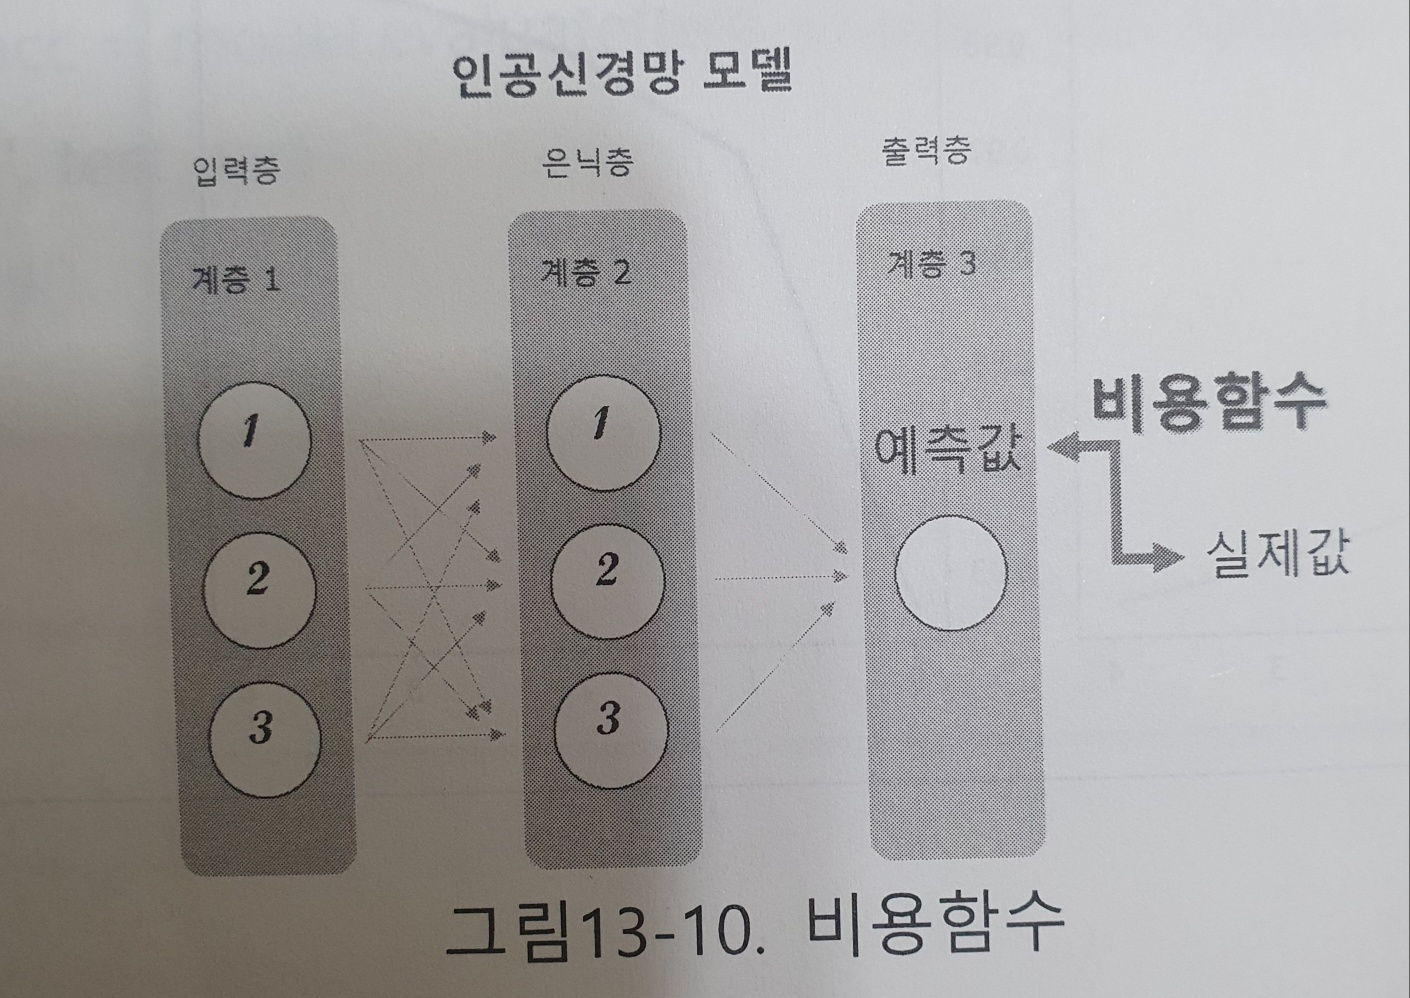

## 옵티마이저
- 역전파 과정에서 가중치를 업데이트 하는데 필요한 하이퍼파라미터를 옵티마이저라고 함.
<br><br>
- 역전파는 신경망에서 다시 거꾸로 되돌아가서 가중치를 수정하는 기능.
<br><br>
- 비용함수의 값을 줄여나가면서 학습하는 방법은 어떤 옵티마이저를 사용하느냐에 따라 달라짐.
<br><br>
- 옵티마이저는 아래와 같은 방법이 있음
<br><br>
>- 배치 경사 하강법(Batch Gradient Descent)
<br><br>
>- 확률적 경사 하강법(Stochastic Gradient Descent, SGD)
<br><br>
>- 미니 배치 경사 하강법(Mini-Batch Gradient Descent)
<br><br>
>- 아다그리드(Adagrad)
<br><br>
>- 알엠에스프롭(RMSprop)
<br><br>
>- 아담(Adam)등
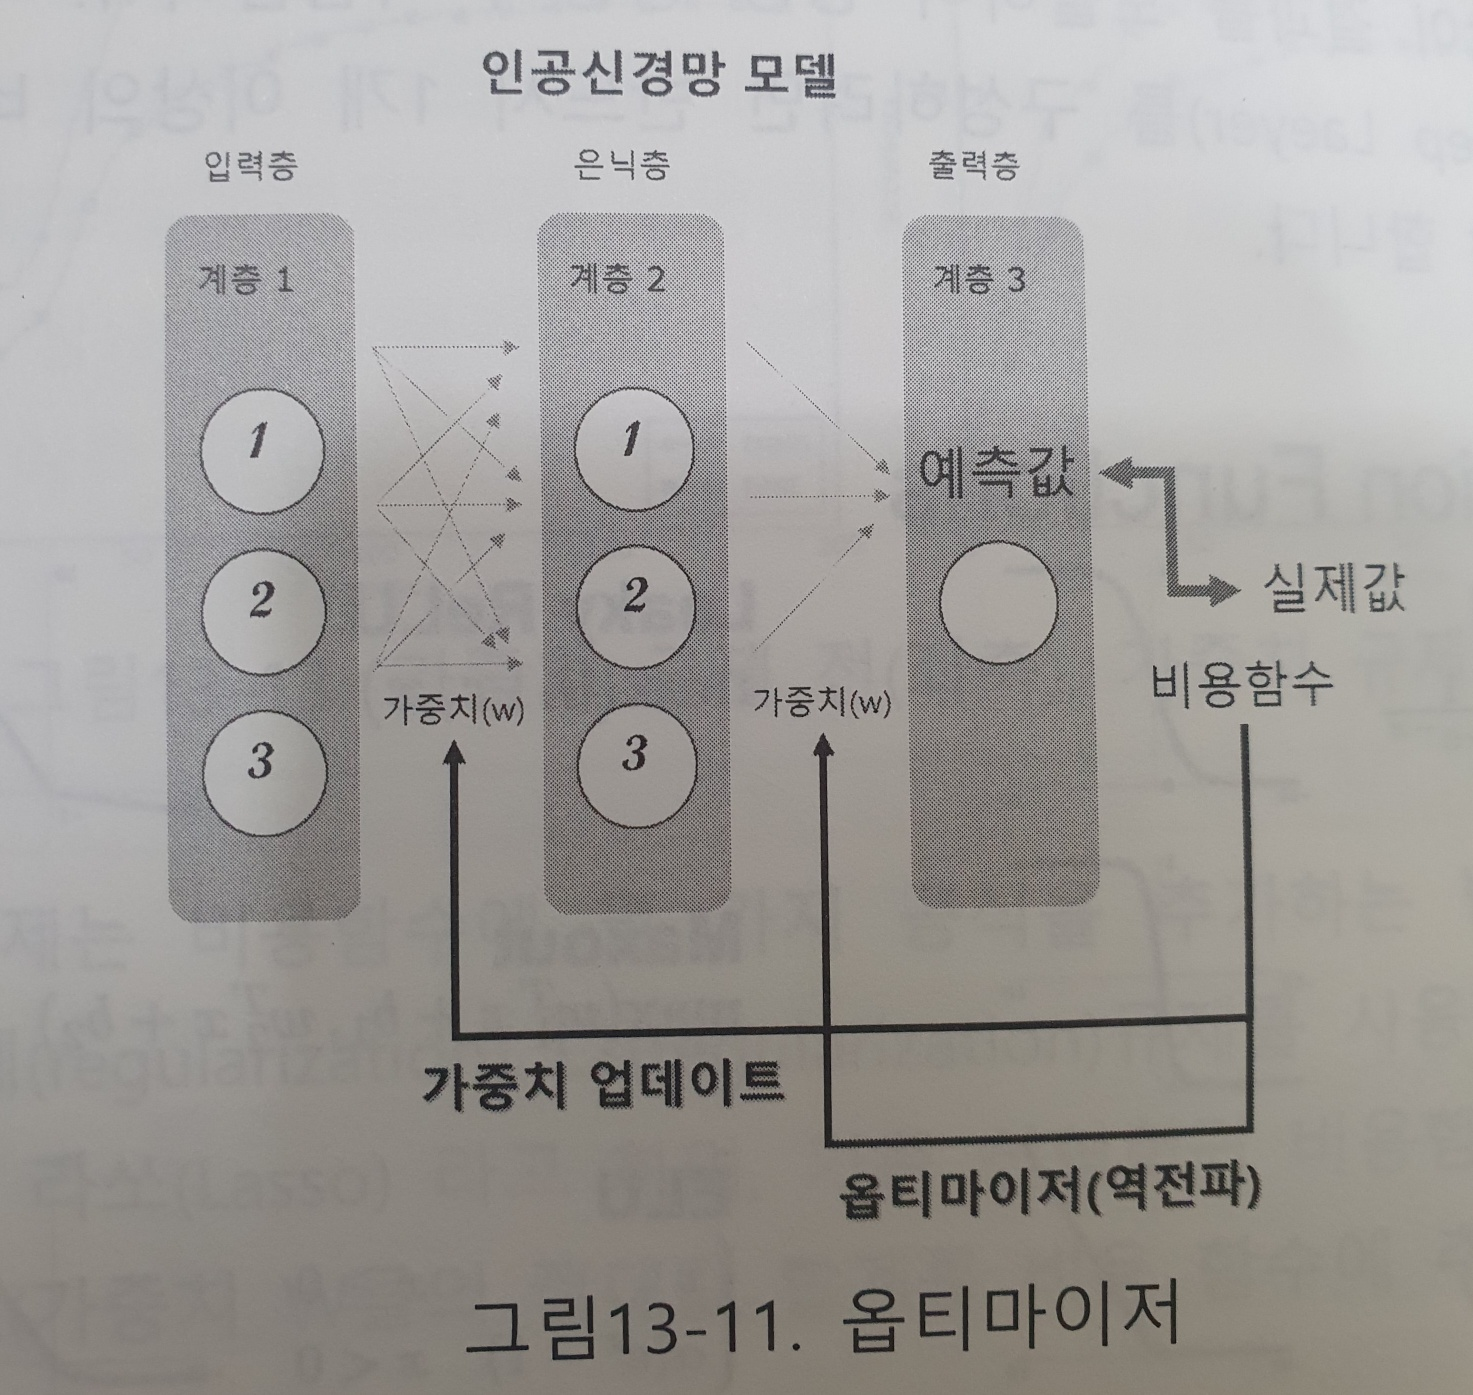

## 활성화 함수
- 활성화 함수(Activation Function)는 입력층에서 정보를 입력을 받아 활성, 비활성을 결정하는데 사용되는 함수입니다. <br><br>
- 입력값에 따라 출력 값의 모양이 어떤가에 따라 선형과 비선형으로 나눌 수 있습니다. <br><br>
- 선형함수는 입력의 상수배만큼 변하는 것으로 선형회귀에서 살펴본 f(x) = x, f(x) = ax 또는 f(x) = ax + b등 의 1차 함수가 있으며 모두 1개의 직선 모양입니다.<br><br>
- 반면 비선형은 2개 이상의 직선 또는 곡선 모양을 가지고 있습니다.<br><br>
- 비선형 함수에는 시그모이드(Sigmoid), ReLU 등이 있습니다.<br><br>
- 인공신경망에서 활성화 함수는 반드시 선형함수가 아닌 '비선형함수'를 사용해야 합니다.<br><br>
- 왜나햐면 은닉층이 여러개 다층으로 구성되어 활성화함수를 선형함수를 이용하는 경우 단층으로 구성한 것과 똑같이 결과를 도출하여 성능 향상이 어렵습니다.<br><br>
- 따라서 깊은망 또는 심층망(Deep Layer)를 구성하려면 반드시 1개 이상의 비선형 활성화 함수를 사용해야 합니다.<br><br>
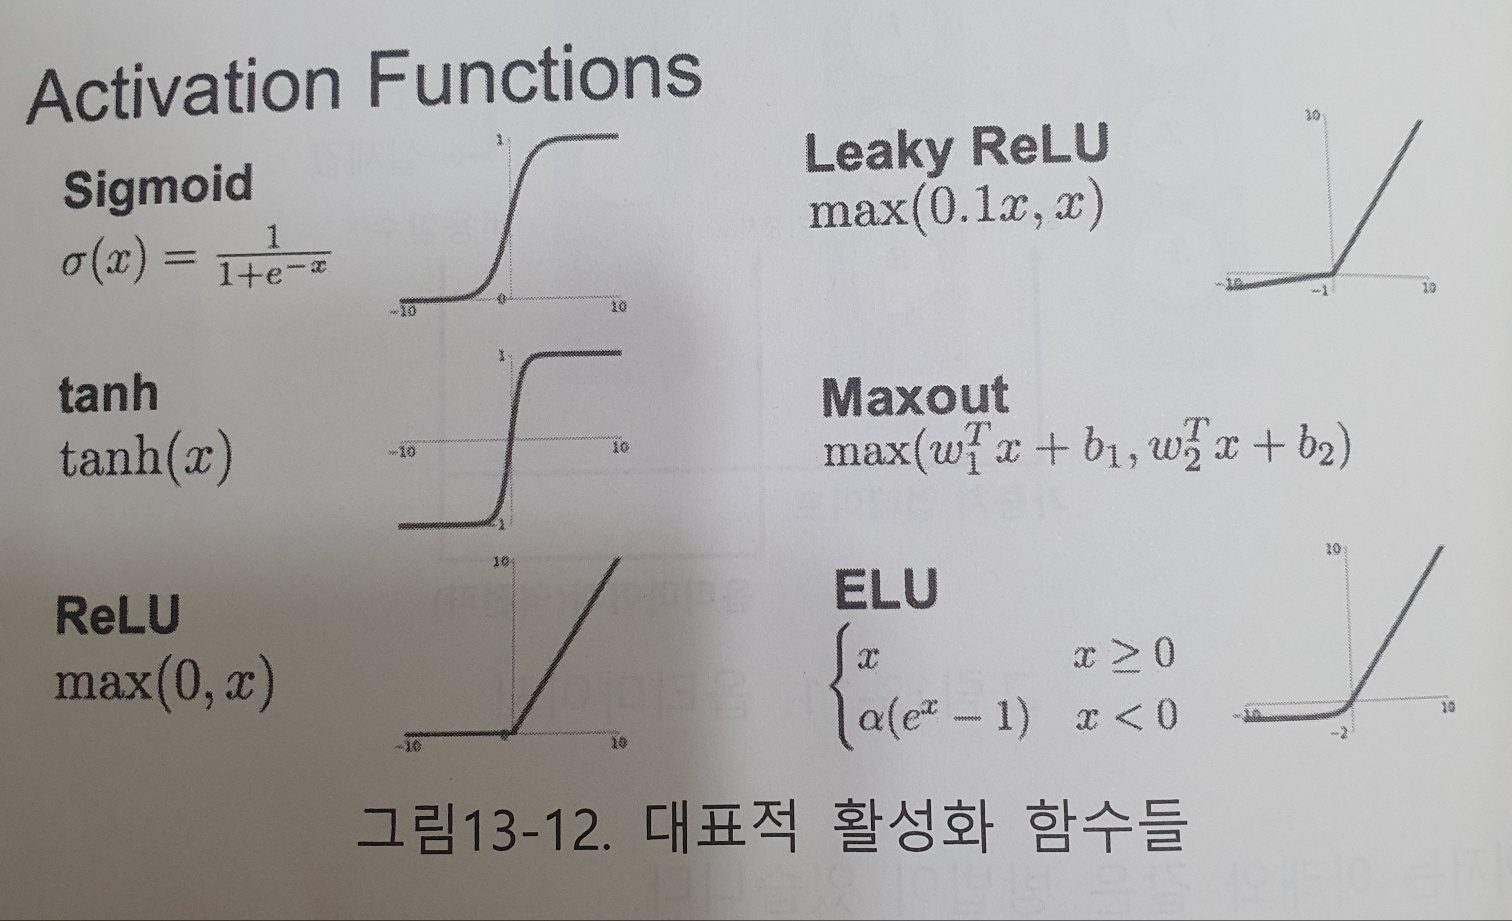

## 가중치 감소와 규제

- 과대적합이란 머신러닝(여기ㅣ서는 신경망) 모델이 너무 과한 학습으로 인해 훈련 데이터에만 지나치게 적응되어 그 이외의 시험 데이터에 대해서는 제대로 대응하지 못하는 것을 의미한다고 했습니다.
<br><br>
- 훈련 데이터가 매우 많다면 과대적합을 줄일 수 있지만, 현실적인 이유로 많이 확보 못하는 경우가 많습니다.
<br><br>
- 이런 상황에서 과대적합을 줄이도록 하는 여러 기법 중 하나가 바로 가중치 감소(Weight decay)입니다.
<br><br>
- 가중치 감소는 학습 과정에서 큰 가중치에 대해서 그에 상응하는 큰 패널티를 부과하여 과대적합을 억제하는 방법입니다.
<br><br>
- 과대적합은 가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문입니다.
<br><br>
- 가중치 감수를 위해 사용되는 방법이 가중체 규제입니다.
<br><br>
- 가중치 규제는 비용함수에 몇 가지 공식을 추가하는 방법을 사용합니다.
<br><br>
- 보통 L1 규제(regularization), L2(regularization)규제를 사용합니다.
<br><br>
- L1 규제는 라쏘(Lasso) 라고 하며, 기존 선형회귀 비용함수에 L1 항을 추가 한 것입니다.(가중치 W들의 절대값 합계를 비용 함수에 추가)
<br><br>
- L2 규제는 리지(Ridge) 라고 하며, 기존 L1비용함수에 L2 항을 추가하는 것입니다. L1과 비슷하지만 L1에 세타(theta)값이 업데이트 되었습니다.(모든 가중치 W들의 제곱합을 비용 함수에 추가)

## 데이터 분할 반복

- 머신러닝 모델 생성시 데이터가 너무 많으면 (메모리가 부족하기도 하고) 한 번의 계산으로 최적화된 값을 찾는 것이 어렵다는 점입니다.
<br><br>
- 머신러닝 최적화를 위해서는 한 번의 학습 과정보다 반복적으로 여러 번 학습 과정을 거치며 사용하는 '데이터 분할' 방식으로 성능 향상을 지원합니다.
<br><br>
- 배치사이즈
>- 각 반복마다 사용하는 데이터 사이즈를 배치사이즈(batch size) 라고 하며 배치사이즈는 한 번의 사용되는 데이터 샘플의 크기로 분할되는 데이터 셋을 의미합니다.
<br><br>
- 에포크
>- 한 번의 에포크(epoch)는 인공 신경망에서 전체 데이터 셋에 대해 전진후진(forward pass/backward pass) 과정을 거친 상태를 의미합니다.
<br><br>
>- 즉, 전체 데이터 셋에 대해 한 번 학습을 완료한 상태입니다.
<br><br>
- 반복
>- 반복(iteration)은 에포크를 나누어서 실행하는 횟수라고 생각하면 됩니다.
<br><br>
>- 대용량 데이터는 메모리의 한계와 속도 저하 때문에 한 번의 에포크에 모든 데이터를 추가 할 수는 없습니다.
<br><br>
>- 따라서 데이터를 분할하게 되는데 이때 몇 번 분할하는 가를 반복이라 합니다.
<br><br>